# Basic Brownian simulation and video synthesis in Notebook (with in-notebook videoplayer)

In [1]:
#%% Insert path to import
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import ddm_toolkit
from ddm_toolkit.params import DDMParams
from ddm_toolkit.workflows import simul1_make_simulated_image_stack
from ddm_toolkit.workflows import simul1_save_simulation_result_file

Running inside a Notebook (Jupyter or otherwise)...


In [4]:
from ddm_toolkit.framestreamers import FrameStreamer_ndarray
from ddm_toolkit.utils import VideoPlayerUI

## Brownian simulation and generation of video stack

This is functionally identical to `simul1_simulate_sythesize.py`. It runs the same code, but the simulation/synthesis parameters are defined inside the Notebook.

In [5]:
params = DDMParams() # this generates an empty parameter object
#TODO: (re)document the parameters (descriptions can be found inside the ddm_toolkit.parameters module, need to be converted into MarkDown document)
params.sim_Np = 100
params.sim_bl = 200.
params.sim_Nt = 500
params.sim_T = 1000.
params.sim_D = 0.4
params.sim_img_border = 16.0
params.sim_img_w = 2.0
params.sim_img_Npx = 256
params.sim_img_I_offset = 0.06
params.sim_img_I_noise = 0.003
params.update_simulation_parameters()


In [6]:
ims = simul1_make_simulated_image_stack(params)

  0%|          | 0/500 [00:00<?, ?it/s]

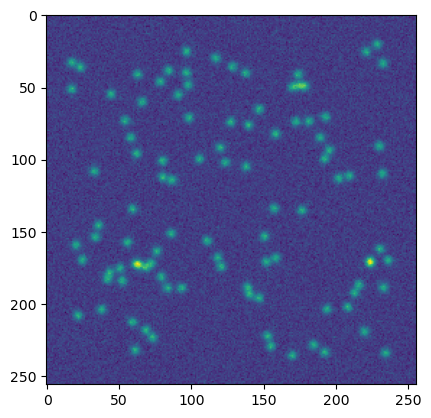

In [7]:
# output a single frame
plt.imshow(ims[0])

We save the simulation result (together with the parameters used) to an NPZ file for later use in the `simulNB2` Notebook.

In [8]:
fpn = '../datafiles/simulNB_simulation_result.npz'
simul1_save_simulation_result_file(fpn, ims, params)

Writing NPZ file with video and simulation parameters...


## In-Notebook videoplayer

In `ddm_toolkit.notebook_utils` we have code that uses `ipywidgets` to make an in-notebook interactive videoplayer.

In [9]:
framestrm = FrameStreamer_ndarray(ims)
videoplay = VideoPlayerUI(framestrm)

In [10]:
videoplay.showUIbox()